In [2]:
import pandas as pd
from tqdm.auto import tqdm
from skimpy import skim
import matplotlib.pyplot as plt
import plotly.express as px
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from concurrent.futures import ThreadPoolExecutor
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
tqdm.pandas()
nltk.download('stopwords')



c:\Users\RAR9\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAR9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data = pd.read_csv('complaints.csv')

C:\Users\RAR9\AppData\Local\Temp\ipykernel_29868\66759690.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('complaints.csv')


## 1) Premiere vision des données

In [26]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2396033 │ │ string      │ 16    │                                                         │
│ │ Number of columns │ 17      │ │ int64       │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0  ┃ p25      ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Complaint ID   │   0 │     0 │  2900000 │  1300000 │   1 │  2000000 │ 3100000 │ 3900000 │ 5000000 │ ▃▃▃▇▇▅ │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴─────┴──────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA            ┃ NA %      ┃ words per row          ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date received                     │             0 │         0 │                      1 │           2396033 │  │
│ │ Product                           │             0 │         0 │                    5.3 │          12804193 │  │
│ │ Sub-product                       │        235164 │      9.81 │                    2.4 │           5700319 │  │
│ │ Issue                             │             0 │         0 │                    5.4 │          12924404 │  │
│ │ Sub-issue                         │        641100 │     26.76 │                    4.2 │          10034123 │  │
│ │ Consumer complaint narrative      │       1560823 │     65.14 │                     67 │         159705177 │  │
│ │ Company public response           │       1414645 │     59.04 │                    6.4 │          15397625 │  │
│ │ Company                           │             0 │         0 │                    3.4 │           8101943 │  │
│ │ State                             │         38502 │      1.61 │                   0.98 │           2358331 │  │
│ │ Tags                              │       2105561 │     87.88 │                   0.19 │            450415 │  │
│ │ Consumer consent provided?        │        734001 │     30.63 │                    1.7 │           4019264 │  │
│ │ Submitted via                     │             0 │         0 │                      1 │           2477660 │  │
│ │ Date sent to company              │             0 │         0 │                      1 │           2396033 │  │
│ │ Company response to consumer      │             3 │         0 │                    3.1 │           7483649 │  │
│ │ Timely response?                  │             0 │         0 │                      1 │           2396033 │  │
│ │ Consumer disputed?                │       1627574 │     67.93 │                   0.32 │            768459 │  │
│ └───────────────────────────────────┴───────────────┴─

## 2) On enleve garde que les 2 colonnes qui nous interessent: le recours et le produit associé

In [6]:
data_complaints = data[['Consumer complaint narrative', 'Product' ]]

In [7]:
data_complaints

,Consumer complaint narrative,Product
0,NaN,"Credit reporting, credit repair services, or o..."
1,I contacted Ally on Friday XX/XX/XXXX after fa...,Vehicle loan or lease
2,NaN,"Credit reporting, credit repair services, or o..."
3,NaN,Credit card or prepaid card
4,Capital One Auto Finance incorrectly and witho...,"Credit reporting, credit repair services, or o..."
...,...,...
2396028,I have disputed my debts several times with no...,Debt collection
2396029,My father died in XX/XX/XXXX. Left me his only...,Mortgage
2396030,cfbp i would Like to file a complaint on Exper...,Credit reporting
2396031,My husband and I are in the middle of an FHA S...,Credit reporting


## 3) On renomme ces colonnes en text et label

In [8]:
map = {"Consumer complaint narrative": "text",
       "Product": "label"
      }

In [9]:
data_complaints = data_complaints.rename(columns=map)

## Nombre de classes existantes

In [10]:
list(data_complaints.label.unique())

['Credit reporting, credit repair services, or other personal consumer reports',
 'Vehicle loan or lease',
 'Credit card or prepaid card',
 'Debt collection',
 'Mortgage',
 'Checking or savings account',
 'Money transfer, virtual currency, or money service',
 'Student loan',
 'Payday loan, title loan, or personal loan',
 'Consumer Loan',
 'Bank account or service',
 'Money transfers',
 'Credit reporting',
 'Credit card',
 'Other financial service',
 'Payday loan',
 'Prepaid card',
 'Virtual currency']

## 4) On regarde l'existence de valeurs manquantes

In [11]:
nan_counts = data_complaints.isna().sum()

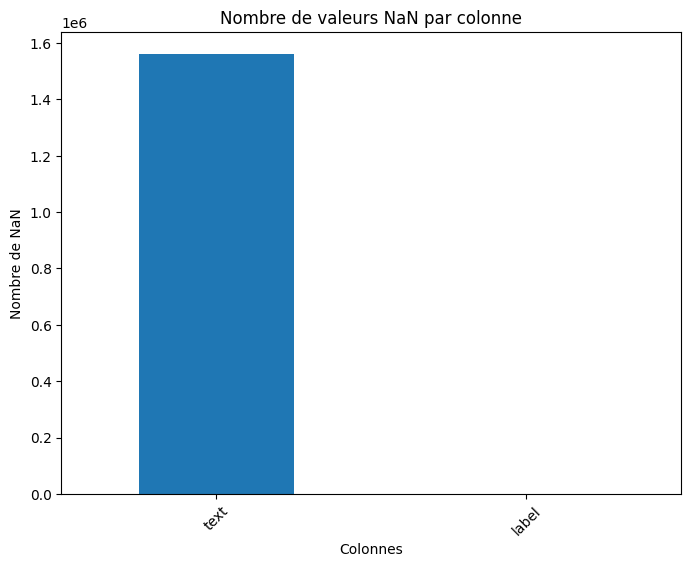

In [37]:
# Tracé du graphe
plt.figure(figsize=(8, 6))
nan_counts.plot(kind='bar')
plt.title('Nombre de valeurs NaN par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NaN')
plt.xticks(rotation=45)
plt.show()

## Il y'en a énormément, autour de la moitié du jeu de donnée, j'ai décidé de les supprimer, on gardera pour l'instant autour de 800000 données

In [12]:
data_complaints = data_complaints.dropna()

In [74]:
skim(data_complaints)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 835210 │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ text                      │       0 │          0 │                          100 │                 83983709 │  │
│ │ label                     │       0 │          0 │                          5.6 │                  4703155 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## 5) On regarde la repartition des labels dans le jeu de donnée (de 800000 données) pour avoir une idée sur l'equilibre des classes

In [5]:
label_counts = data_complaints['label'].value_counts().reset_index()


In [20]:
labels_repartition = px.bar(label_counts, x='label', y='count', title='Repartition des Labels dans le Dataframe', width=1000, height=700)
labels_repartition.show()

## Les classes sont trés désequilibrés, il s'agit d'une information clé que l'on devra prendre en compte dans la suite du projet. Regardons plus en detail

## 6) Pourcentage de représentation des classes par rapport a la classe la plus présente. On pourra envisager d'enlever certaines classes (trés peu de données)

In [8]:
label_counts = data_complaints['label'].value_counts()

max_count = label_counts.max()

label_percentages = (label_counts / max_count) * 100

label_percentages

label
Credit reporting, credit repair services, or other personal consumer reports    100.000000
Debt collection                                                                  49.102065
Mortgage                                                                         26.118326
Credit card or prepaid card                                                      19.127348
Checking or savings account                                                      11.818667
Credit reporting                                                                  9.575952
Student loan                                                                      8.921751
Money transfer, virtual currency, or money service                                5.907818
Credit card                                                                       5.710769
Vehicle loan or lease                                                             4.747050
Bank account or service                                                           4.

## 5 classes representent moins d'1% de données par rapport à la classe la plus présente, on peut les exclure car difficiles à considerer comme distinctions pour le modèle ( pas assez de données)

In [14]:
threshold = max_count * 0.01

classes_to_exclude = label_counts[label_counts < threshold].index

data_complaints = data_complaints[~data_complaints['label'].isin(classes_to_exclude)]

In [16]:
data_complaints['label'].value_counts()

label
Credit reporting, credit repair services, or other personal consumer reports    329868
Debt collection                                                                 161972
Mortgage                                                                         86156
Credit card or prepaid card                                                      63095
Checking or savings account                                                      38986
Credit reporting                                                                 31588
Student loan                                                                     29430
Money transfer, virtual currency, or money service                               19488
Credit card                                                                      18838
Vehicle loan or lease                                                            15659
Bank account or service                                                          14885
Payday loan, title loan, or personal 

## 6) On effectue un premier traitement du texte des recours : tous en minuscules, enlever les caractères bruyants, les mots bloquants, les espaces en trop

In [56]:
RE_URL = re.compile(r'https?://\S+|www\.\S+')
RE_HTML_TAG = re.compile(r'<.*?>+')
RE_NON_ALPHA = re.compile(r"[^a-zA-Z?.!,¿']+")
RE_NUM = re.compile(r'\w*\d\w*')
RE_SPACE = re.compile(r'\s+')

stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def clean_text_vectorized(text_series):
    text_series = text_series.apply(lambda text: emoji.demojize(text))
    text_series = text_series.str.lower()
    text_series = text_series.str.replace(RE_URL, '', regex=True)
    text_series = text_series.str.replace(RE_HTML_TAG, '', regex=True)
    text_series = text_series.str.replace(RE_NUM, '', regex=True)
    text_series = text_series.str.replace(RE_NON_ALPHA, ' ', regex=True)
    text_series = text_series.str.replace(RE_SPACE, ' ', regex=True)
    text_series = text_series.str.strip()

    def remove_stopwords_stemming(text):
        words = text.split()
        filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(filtered_words)

    return text_series.apply(remove_stopwords_stemming)



In [63]:
print('Cleaning text...')
data_complaints['text'] = clean_text_vectorized(data_complaints['text'])
print('Done!')

Cleaning text...
Done!


In [64]:
time_min_method_traditional = 44

## Cette methode non optimisé prend beaucoup de temps (44 min) à cause des 800000 données à parcourir. 
## La complexité algorithmique approximative pour un seul élément est $$ O(m) $$ où m est la longueur du texte.
## Pour l'ensemble de la série avec n éléments, la complexité totale est $$ O(n \cdot m) $$ avec m la longueur en moyenne du texte.


## 7) On sauvegarde ce premier preprocessing sur le jeu de donnée initial.

In [17]:
data_complaints.to_csv('complaints_cleaned.csv', index=False)